Datei öffnen (Dateiname ändern):

In [63]:
import xarray as xr
import matplotlib.pyplot as plt
ds = xr.open_dataset("era5_rh_all.nc")
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 141, longitude: 141, time: 1826)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.75 -9.5 -9.25 ... 24.5 24.75 25.0
  * latitude   (latitude) float32 67.5 67.25 67.0 66.75 ... 33.0 32.75 32.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1983-12-31
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.4rc4 (http://code.zmaw.d...
    Conventions:  CF-1.4
    history:      Thu May 09 09:36:53 2019: cdo mergetime era5_rh_1979.nc era...
    CDO:          Climate Data Operators version 1.6.4rc7 (http://code.zmaw.d...


Kontrolle, ob Daten plausibel sind

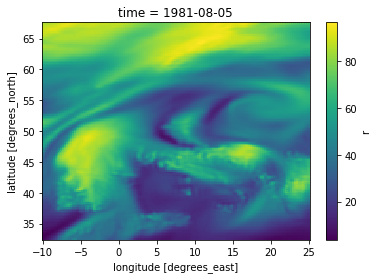

In [67]:
ds.r[947,:,:].plot()

Gleitendes Mittel über 21 Tage bilden (Tag +- 10):

In [68]:
ds_mitt=ds.rolling(time=21,center=1).mean()

In [69]:
print(ds_mitt)

<xarray.Dataset>
Dimensions:    (latitude: 141, longitude: 141, time: 1826)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.75 -9.5 -9.25 ... 24.5 24.75 25.0
  * latitude   (latitude) float32 67.5 67.25 67.0 66.75 ... 33.0 32.75 32.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1983-12-31
Data variables:
    r          (time, latitude, longitude) float32 nan nan nan ... nan nan nan


Kontrolle mit Zeitreihe:

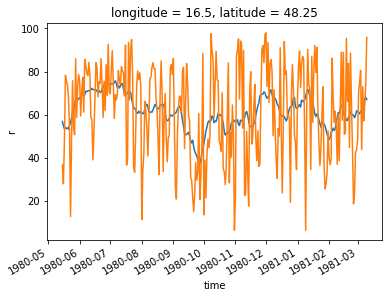

In [72]:
ds_mitt.r[500:800,77,106].plot() # Zeitserie Wien
ds.r[500:800,77,106].plot()

Berechnung von Klimatologie und Anomalie:

In [73]:
climatology = ds_mitt.groupby('time.dayofyear').mean('time')  # sinnlos wenn nur 1 Jahr

In [74]:
anomalies = ds.groupby('time.dayofyear') - climatology

Kontrolle mit Zeitreihe und Plot der Aomalie:

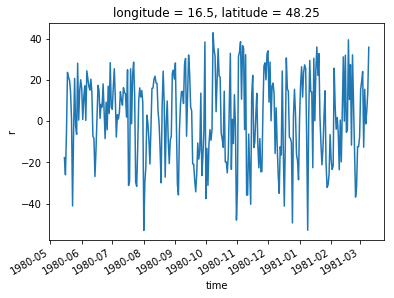

In [76]:
anomalies.r[500:800,77,106].plot()

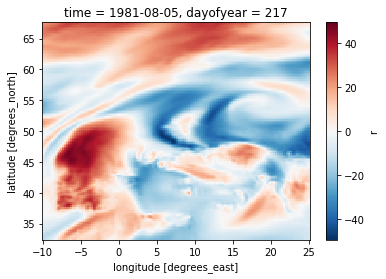

In [77]:
anomalies.r[947,:,:].plot()